## Spotify Popularity Prediction 

Music streaming services like apple music and spotify are popular these days and widely used. I wanted to apply ML algorithms to this Spotify dataset to predict song popularity. 

The goal of the best model developed is to predict a song's popularity based on various features (current and historic).

#### Objective: 
The objective of the "Spotify Popularity Prediction - Machine Learning" project is to develop a machine learning model that can accurately predict the popularity of songs on the Spotify music streaming platform. By analyzing various song features and historical data, the model aims to provide insights into the factors that contribute to a song's popularity, allowing artists, music labels, and users to make informed decisions about song selection, promotion strategies, and playlist curation.

#### Synopsis: 

The popularity of a song plays a crucial role in its success, and understanding the factors that contribute to its popularity can greatly benefit artists, music labels, and streaming platforms.

The project begins by gathering a large dataset of songs from Spotify, including their important features such as acousticness, danceability, energy, instrumentalness, loudness etc.

Next, the dataset is preprocessed by cleaning and transforming the data into a suitable format for machine learning. This may involve handling missing values and encoding categorical variables.

With the preprocessed dataset, various machine learning algorithms can be explored and evaluated. This includes techniques such as decision trees, random forests, support vector machines, or even more advanced methods like gradient boosting.

Once the model is trained and validated, it can be used to predict the popularity of new songs.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For validation
from sklearn.model_selection import train_test_split as split

# For transformations and predictions
from scipy.optimize import curve_fit
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# For models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# For boosting
from sklearn.ensemble import AdaBoostClassifier

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [7]:
#import data 

df = pd.read_csv("data.csv")
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [8]:
#drop unnecessary cols

df = df.drop(["explicit","id","mode","name","release_date"],axis=1)

In [9]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0.563,10,0.1510,-12.428,0,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0.901,8,0.0763,-28.454,0,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0.000,5,0.1190,-19.924,0,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0.887,1,0.1110,-14.734,0,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0.908,11,0.0980,-16.829,1,0.0424,62.149,0.0693,1928


In [10]:
df.shape
#there are 14 features and 1 target variable that is Popularity

(169909, 14)

In [11]:
#check for null values 
df.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
popularity          0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [12]:
# check for duplicates 
df.duplicated().sum()

669

In [13]:
# Drop duplicates (there's no null values)
df = df[~df.duplicated()==1]

In [14]:
df.duplicated().sum()

0

In [15]:
# lets create a new column to classify popularity obeservations into 3 types : unpopular,medium and popular. 

classified = df.copy()
#This line creates a copy of the original DataFrame df and assigns it to a new variable called classified. This is done to avoid modifying the original DataFrame.

for i, row in classified.iterrows():
    score = 'unpopular'
    if(row.popularity > 50) & (row.popularity < 75):
        score = 'medium'
    elif row.popularity >= 75:
        score = 'popular'
    classified.at[i,'pop_rating'] = score    

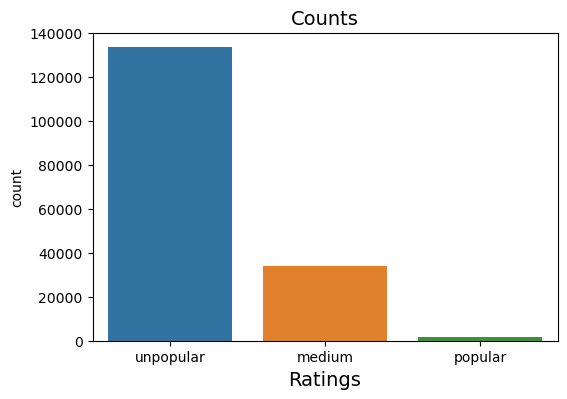

In [16]:
# Differenr classes in the classified dataset present a high level of imbalance. 
#We need to treat it in order to ensure the models perform well. 
# we are plotting that data on the following chart, to visualize the difference.
fig, ax = plt.subplots(1,1, figsize=(6,4))
_ = sns.countplot(x='pop_rating', data=classified)
_ = plt.xlabel('Ratings', fontsize=14)
_ = plt.title('Counts', fontsize=14)

### EDA 

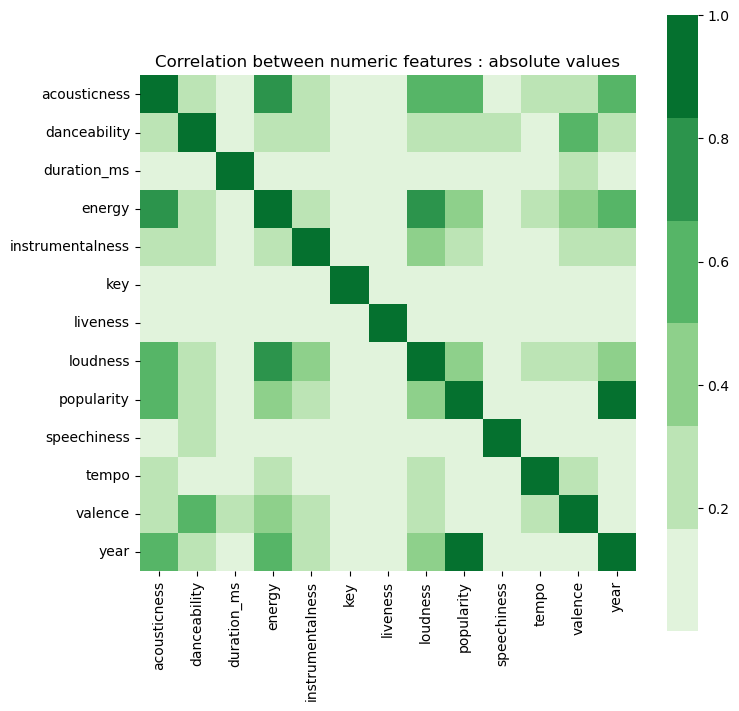

In [17]:
numeric_cols = df.columns[df.dtypes != 'object']
numeric_df = pd.DataFrame(data = df, columns = numeric_cols,index = df.index)

corr = np.abs(numeric_df.corr())
fig , ax = plt.subplots(figsize = (8,8))
cmap = sns.color_palette("Greens")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numeric features : absolute values')
plt.show()

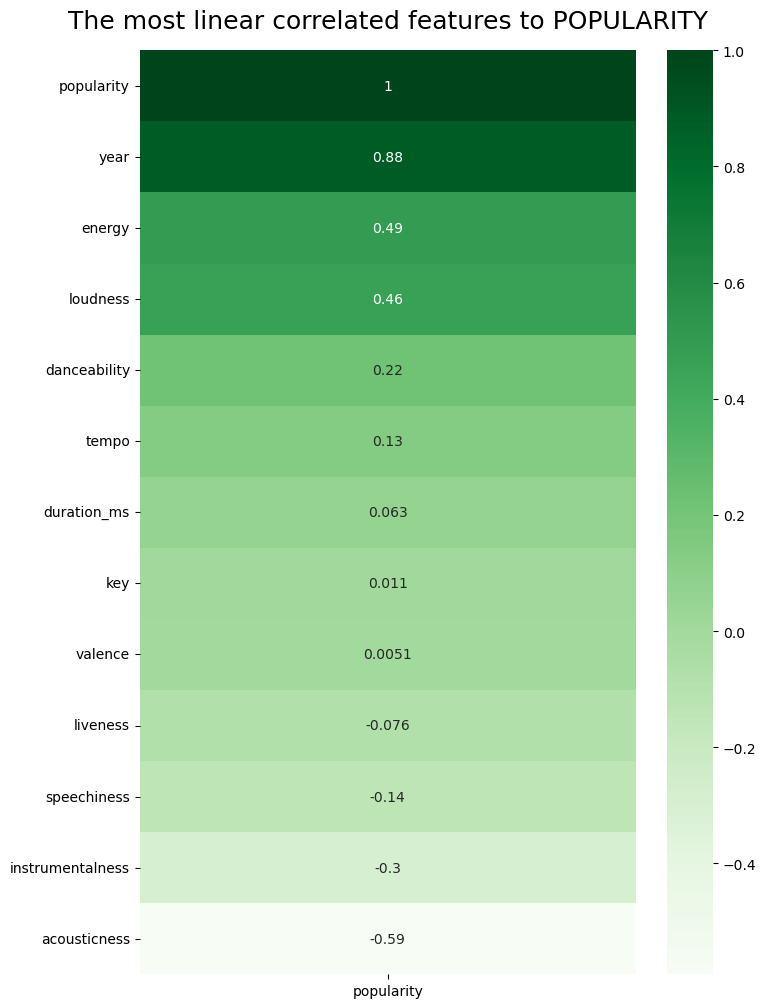

In [18]:
# Find the most linear correlated features to Popularity 
corr = numeric_df.corr()[['popularity']].sort_values(by='popularity', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corr, annot=True, cmap='Greens')
heatmap.set_title('The most linear correlated features to POPULARITY', 
                  fontdict={'fontsize':18}, pad=16);

### YEAR 

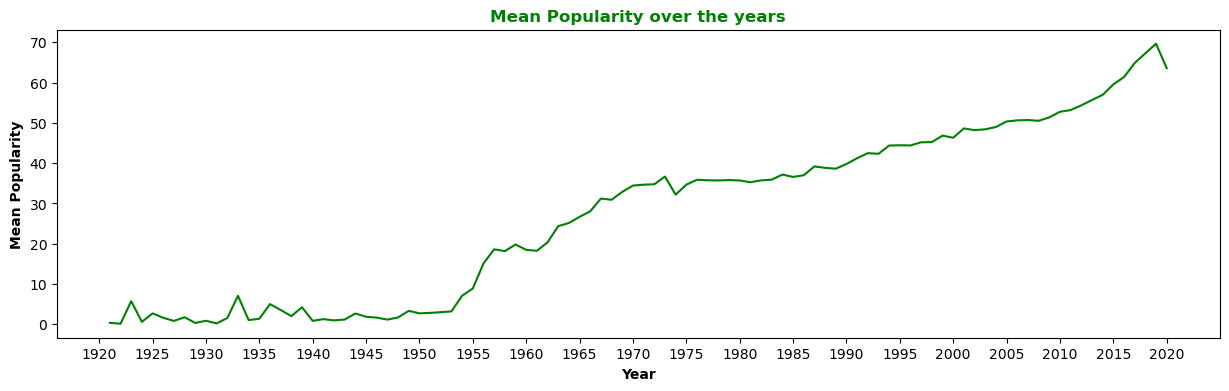

In [19]:
fig, ax = plt.subplots(figsize=(15, 4))
ax = df.groupby('year')['popularity'].mean().plot(color='green')
ax.set_title('Mean Popularity over the years', c='green', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_xticks(range(1920, 2021, 5))
plt.show()

### ENERGY

In [20]:
#Plots a scatterplot with a regression line using given inputs
def regress_plot(x='', y='', data=None, xlab='', ylab='', titl=''):
    data = data.groupby(x)[y].mean().to_frame().reset_index()
    fig, ax = plt.subplots(figsize=(10,6))
    _ = sns.regplot(x=x, y=y, data=data, scatter_kws={'color': 'g', "s": 10}, line_kws={'color':'black'} )
    _ = plt.xlabel(xlab, fontsize=12)
    _ = plt.ylabel(ylab, fontsize=12)
    _ = plt.title(titl, fontsize=14, c='green')
    _ = plt.ylim(-3, 103)
    plt.show()

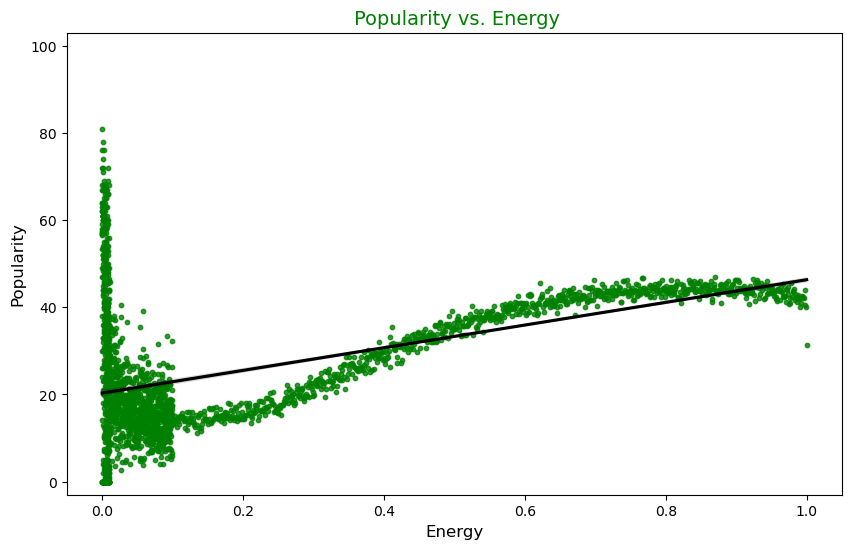

In [21]:
regress_plot(x='energy', y='popularity', data=df, xlab='Energy', ylab='Popularity', titl=' Popularity vs. Energy')

### LOUDNESS 

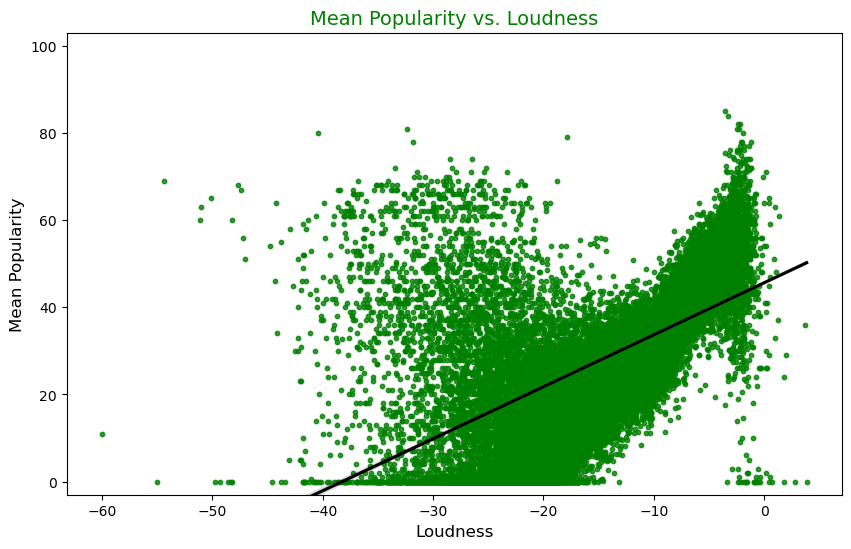

In [22]:
regress_plot(x='loudness', y='popularity', data=df, xlab='Loudness', ylab='Mean Popularity', titl='Mean Popularity vs. Loudness')

### DANCEABILITY 


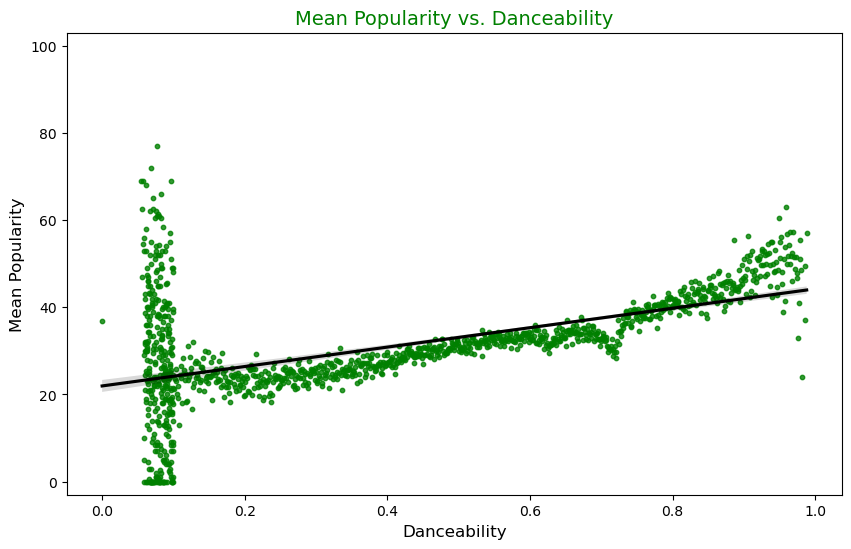

In [23]:
regress_plot(x='danceability', y='popularity', data=df, xlab='Danceability', ylab='Mean Popularity',
             titl='Mean Popularity vs. Danceability')

### ACOUSTICNESS  


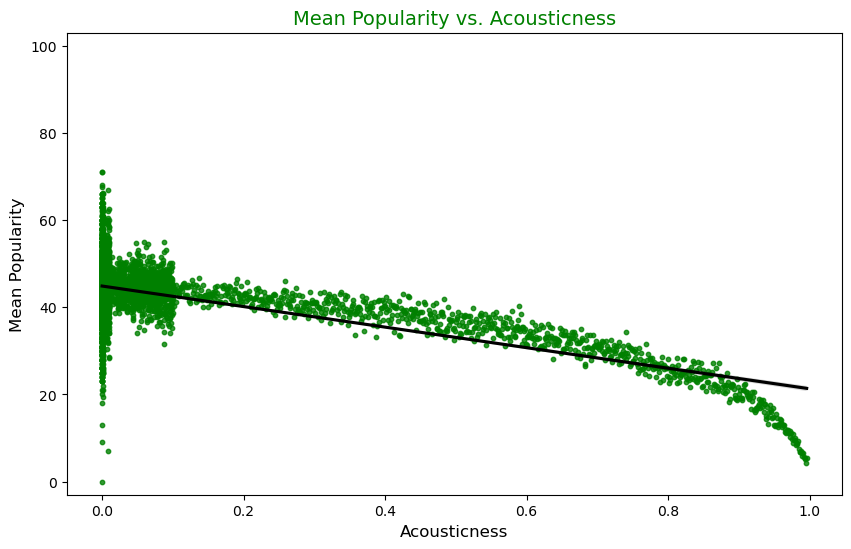

In [24]:
regress_plot(x='acousticness', y='popularity', data=df, xlab='Acousticness', ylab='Mean Popularity',
             titl='Mean Popularity vs. Acousticness')

### Pre-Processing
* Import data with relevant columns only
* Split data to train & test

In [25]:
df = pd.read_csv ('data.csv')

In [26]:
#drop duplicates 

df = df[~df.duplicated()==1]

In [27]:
#convert milliseconds to minutes 

df["duration_mins"] = df["duration_ms"]/60000
df.drop(columns="duration_ms", inplace=True)

In [28]:
#Remove square brackets from the artists col

df["artists"]=df["artists"].str.replace("[", "")
df["artists"]=df["artists"].str.replace("]", "")
df["artists"]=df["artists"].str.replace("'", "")

C:\Users\saund\AppData\Local\Temp\ipykernel_21800\4199814703.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["artists"]=df["artists"].str.replace("[", "")
C:\Users\saund\AppData\Local\Temp\ipykernel_21800\4199814703.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["artists"]=df["artists"].str.replace("]", "")


###  Prep

In [29]:
data = df.copy()

data.loc[((df.popularity >= 0) & (df.popularity <= 30)), "popularity_level" ] = 1
#selects rows where the "popularity" column values are greater than or equal to 0 and less than or equal to 30.
#assigns a value of 1 to the corresponding rows in the "popularity_level" column of the data DataFrame.
data.loc[((df.popularity > 30) & (df.popularity <= 60)), "popularity_level" ] = 2
data.loc[((df.popularity > 60) & (df.popularity <= 100)), "popularity_level" ] = 3

data["popularity_level"] = data["popularity_level"].astype("int")
#converts the "popularity_level" column in the data DataFrame to integer type.
#values in the "popularity_level" column are assigned as integers 1, 2, or 3, depending on the corresponding ranges of the "popularity" column
data.head()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_mins,popularity_level
0,0.995,Carl Woitschach,0.708,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,2.644133,1
1,0.994,"Robert Schumann, Vladimir Horowitz",0.379,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,4.702217,1
2,0.604,Seweryn Goszczyński,0.749,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,1.738333,1
3,0.995,Francisco Canaro,0.781,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,3.012667,1
4,0.990,"Frédéric Chopin, Vladimir Horowitz",0.210,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,11.462217,1


In [30]:
# count values present in popularity levels
data['popularity_level'].value_counts()

2    77568
1    76724
3    15617
Name: popularity_level, dtype: int64

In [31]:
artists = ['Drake', 'Lady Gaga', 'Taylor Swift', 'The Weeknd']

# Create a list of indices corresponding to the artists above
# The first comprehension creates a list of lists, the second flattens it into one
to_drop = [data[data.artists == name].index.tolist() for name in artists]
to_drop = [ind for sub in to_drop for ind in sub]

# Gather the test cases
df_x = data.copy()
cases = df_x[df_x.index.isin(to_drop)]

# Remove the test cases from data
data.drop(to_drop, inplace=True)

## Drop unnecessary columns 
data = data.drop(["popularity", "explicit", "id", "mode", "name", "release_date", "artists"], axis=1)

data.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration_mins,popularity_level
0,0.995,0.708,0.1950,0.563,10,0.1510,-12.428,0.0506,118.469,0.7790,1928,2.644133,1
1,0.994,0.379,0.0135,0.901,8,0.0763,-28.454,0.0462,83.972,0.0767,1928,4.702217,1
2,0.604,0.749,0.2200,0.000,5,0.1190,-19.924,0.9290,107.177,0.8800,1928,1.738333,1
3,0.995,0.781,0.1300,0.887,1,0.1110,-14.734,0.0926,108.003,0.7200,1928,3.012667,1
4,0.990,0.210,0.2040,0.908,11,0.0980,-16.829,0.0424,62.149,0.0693,1928,11.462217,1


In [32]:
# Prepare data for prediction
data.drop(data[data['popularity_level']==2].index[0:60000],inplace=True)
data.drop(data[data['popularity_level']==1].index[0:60000],inplace=True)
#retrieves the index values of the selected rows up to the first 60000 rows.

In [33]:
data.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration_mins,popularity_level
5085,0.7800,0.554,0.330,0.000003,3,0.1070,-10.866,0.0300,128.214,0.297,1990,4.013333,3
5549,0.2900,0.749,0.662,0.000014,4,0.3550,-7.585,0.0468,126.998,0.740,1994,3.976217,3
5683,0.0309,0.490,0.418,0.000020,2,0.0615,-10.773,0.0572,98.507,0.226,1996,4.654450,3
6167,0.5380,0.585,0.702,0.000000,0,0.2160,-5.734,0.0325,139.909,0.510,2001,3.358883,3
6235,0.0180,0.508,0.826,0.000000,1,0.2800,-4.088,0.0405,120.854,0.404,2001,3.417783,3


In [34]:
y = data['popularity_level']
X = data.drop(columns=['popularity_level'])
#creates a new DataFrame X by dropping the "popularity_level" column from the data DataFrame
#The X DataFrame represents the input features or independent variables used for prediction
X_train, X_test, y_train, y_test = split(X, y, test_size = 0.25, random_state = 42)

###  Feature Transformation

to create a dataset where each format helps improve your AIML models' performance.

Steps followed in Feature Transformation are:

- Object data of the artists with some numerical indicator that identify the artist.
- Eliminate Zero values from tempo columns and replace it
- Standardizing Instrumental Criteria with numeric values
- Using OneHotEncoder from SKlearn to create dummies
- Minmax Scaling for relevant features
- Target Scaling for Popularity Column
- A one hot encoding is a representation of categorical variables as binary vectors.
- This first requires that the categorical values be mapped to integer values.
- Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [35]:
ctr = ColumnTransformer([('minmax', MinMaxScaler(), ['year', 'tempo', 'duration_mins']),
                        ('categorical', OneHotEncoder(), ['key'])],
                       remainder='passthrough')
#means that the remaining columns will be passed through without any transformation.

In [36]:
ctr .fit(X_train)# fits the ColumnTransformer ctr to the training set X_train
X_train_preprocessed = ctr .transform(X_train) #applies the learned transformations from ctr to the training set X_train.
X_test_preprocessed = ctr .transform(X_test) #applies the same transformations learned from ctr to the testing set X_test

###  Modeling

The following are the algorithms we chose to use in the dataset analysis :

1. Decision Tree : The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. The deeper the tree, the more complex the decision rules and the fitter the model. 

2. Logistic regression : It predicts a dependent data variable by analyzing relationship between one or more existing independent variables. 

3. Random forest  : A random forest is a meta estimator that fits a number of DT classsifiers on various subsets of the dataset and uses averaging to improve the accuracy and control over-fitting. 

4. K-Nearest Neighbor : classification is computed from a simple majority vote of the nearest neighbors of each point : a query point is assigned to the data class which has the most representatives within the nearest neighbors of the point. 

5. Adaboost Classifier : It builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. 

6. SVM : the objective of the SVM algorithm is to find a hyperplane in an N-dimensional space (N -  the number of features) that distinctnly classifies the data points. 

In [51]:
results = []

def run_model(model, alg_name):
   # build the model on training data
   model.fit(X_train, y_train)
 
   # make predictions for test data
   y_pred = model.predict(X_test)
   # calculate the accuracy score
   accuracy =  accuracy_score(y_test, y_pred)
   cm = confusion_matrix(y_test, y_pred)
   scoresDT3 = cross_val_score(model, X_test, y_test, cv=6)
   Cr = classification_report(y_test, y_pred)
   results.append((alg_name, accuracy, model))
   print(Cr)


### Decision tree :

Basic DT classifier. Only generates 1 DT so it's not that intensive but also likely to overfit. 

class 1, the precision is 0.89, meaning that out of all instances predicted as class 1, 89% were actually true positives.
For class 2, the precision is 0.67, indicating that 67% of instances predicted as class 2 were true positives.
For class 3, the precision is 0.67, meaning that 67% of instances predicted as class 3 were true positives.

For class 1, the recall is 0.90, meaning that the model correctly identified 90% of the actual class 1 instances.
For class 2, the recall is 0.66, indicating that the model captured 66% of the actual class 2 instances.
For class 3, the recall is 0.68, meaning that the model identified 68% of the actual class 3 instances.

Higher F1-scores indicate better overall performance. In this case:
For class 1, the F1-score is 0.90.
For class 2, the F1-score is 0.67.
For class 3, the F1-score is 0.67.
The overall accuracy of the model is reported as 0.75, which means that the model correctly predicted the class for 75% of the instances in the test set

In [52]:
model = DecisionTreeClassifier()
run_model(model, "Decision Tree")

              precision    recall  f1-score   support

           1       0.89      0.90      0.90      4147
           2       0.67      0.66      0.67      4338
           3       0.67      0.68      0.67      3869

    accuracy                           0.75     12354
   macro avg       0.75      0.75      0.75     12354
weighted avg       0.75      0.75      0.75     12354



In [53]:
model = SVC(kernel='poly', degree=3, C=1)
run_model(model, "SVM Classifier")

              precision    recall  f1-score   support

           1       0.90      0.93      0.92      4147
           2       0.74      0.67      0.70      4338
           3       0.72      0.77      0.74      3869

    accuracy                           0.79     12354
   macro avg       0.79      0.79      0.79     12354
weighted avg       0.79      0.79      0.79     12354



### K- Nearest Neighbors Classifier

In [54]:
model = KNeighborsClassifier()
run_model(model, "Nearest Neighbors Classifier")

C:\Users\saund\anaconda2023\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\saund\anaconda2023\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

              precision    recall  f1-score   support

           1       0.92      0.92      0.92      4147
           2       0.70      0.77      0.74      4338
           3       0.77      0.68      0.72      3869

    accuracy                           0.79     12354
   macro avg       0.80      0.79      0.79     12354
weighted avg       0.80      0.79      0.79     12354



### Logisitic regression

In [55]:
model = LogisticRegression(multi_class='multinomial' , solver='lbfgs', max_iter=100)
run_model(model, "Logistic Regression")

C:\Users\saund\anaconda2023\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saund\anaconda2023\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

              precision    recall  f1-score   support

           1       0.66      0.69      0.67      4147
           2       0.52      0.41      0.46      4338
           3       0.54      0.64      0.59      3869

    accuracy                           0.58     12354
   macro avg       0.57      0.58      0.57     12354
weighted avg       0.57      0.58      0.57     12354



C:\Users\saund\anaconda2023\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Adaboost classifier

In [56]:
dt_b = DecisionTreeClassifier(max_depth=1, random_state=42)
model = AdaBoostClassifier(base_estimator=dt_b)
run_model(model, "Adaboost Classifier")

              precision    recall  f1-score   support

           1       0.96      0.92      0.94      4147
           2       0.69      0.68      0.69      4338
           3       0.68      0.74      0.71      3869

    accuracy                           0.77     12354
   macro avg       0.78      0.78      0.78     12354
weighted avg       0.78      0.77      0.78     12354



### Random forest 

In [58]:
model = RandomForestClassifier(n_estimators=10)
run_model(model, "Random Forest")

              precision    recall  f1-score   support

           1       0.95      0.92      0.93      4147
           2       0.69      0.86      0.77      4338
           3       0.83      0.64      0.72      3869

    accuracy                           0.81     12354
   macro avg       0.82      0.80      0.81     12354
weighted avg       0.82      0.81      0.81     12354



### Results :



In [34]:
from tabulate import tabulate

print("Classification Results")
rows = list()

for res in results:
    rows.append([res[0], res[1] ]) #a new list is created with two elements: res[0] (the algorithm name) and res[1] (the accuracy).
    #list is appended to the rows list
    
tab = tabulate(rows, headers=['Algorithm', 'Accuracy'], tablefmt='fancy_grid')
print(tab)

Classification Results
╒══════════════════════════════╤════════════╕
│ Algorithm                    │   Accuracy │
╞══════════════════════════════╪════════════╡
│ Decision Tree                │   0.746479 │
├──────────────────────────────┼────────────┤
│ SVM Classifier               │   0.790108 │
├──────────────────────────────┼────────────┤
│ Nearest Neighbors Classifier │   0.79367  │
├──────────────────────────────┼────────────┤
│ Logistic Regression          │   0.575846 │
├──────────────────────────────┼────────────┤
│ Adaboost Classifier          │   0.77481  │
├──────────────────────────────┼────────────┤
│ Random Forest                │   0.808483 │
╘══════════════════════════════╧════════════╛


In [63]:
cases_mix = cases.sample(frac=1.0, random_state=42).reset_index(drop=True)
#This line shuffles the rows of the cases DataFrame randomly by sampling a fraction of 1.0 (which means all rows) with a random state of 42. 
#The reset_index(drop=True) part resets the index of the shuffled DataFrame.
cases_mix
cases_drop = cases_mix.drop(['artists', 'name', 'popularity', 'id',  'release_date'], axis=1)
#the columns 'artists', 'name', 'popularity', 'id', and 'release_date' are dropped from the cases_mix DataFrame. 
#This means those columns will not be considered in subsequent analysis
cases_enc = pd.get_dummies(cases_drop, columns=['mode'])
# This line performs one-hot encoding on the cases_drop DataFrame. 
cases_X = cases_enc.drop(['popularity_level', 'mode_0', 'mode_1', 'explicit'], axis=1)
#: Here, the columns are dropped from the cases_enc DataFrame. The remaining columns in cases_X will be used as the input features for prediction.
cases_y = cases_mix[['popularity_level']]
#creates a DataFrame, cases_y, containing only the 'popularity_level' column from the original cases_mix DataFrame. 
#This column will be used as the target variable for prediction.
cases_pred = pd.DataFrame(results[4][2].predict(cases_X), columns=['popularity_rate'])

In [64]:
pd.set_option('display.max_rows', df.shape[0]+1)
res = pd.concat([cases_mix, cases_pred], axis=1)
res.iloc[:,[1,11,12,19,20]]

,artists,name,popularity,popularity_level,popularity_rate
0,The Weeknd,Montreal,56,2,3
1,Drake,6PM In New York,55,2,3
2,Drake,The Ride,55,2,2
3,Drake,In My Feelings,81,3,3
4,Taylor Swift,A Place in this World,49,2,3
5,Lady Gaga,Applause,72,3,3
6,Drake,Headlines,72,3,3
7,Lady Gaga,Monster,44,2,2
8,Drake,Right Hand,62,3,3
9,The Weeknd,House Of Balloons / Glass Table Girls,48,2,3
